## **Validación de nuestros datos y experimentos**

### importando librerias

Se importan las librerias a utilizar durate el proceso de exploración de datos, dentro de las librerias importamos **utilities**, libreria construida específicamente para propósitos de nuestro proyecto.

In [1]:
# Preparamos el entorno
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import sys
import os

module_path = os.path.abspath(os.path.join('/Users/juanmanuelpaiba/Documents/Juan_Paiba/AB_Testing_Meli/', 'python_scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utilities import AnalisisExperimento # type: ignore

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df_grouped_experiments = pd.read_csv("/Users/juanmanuelpaiba/Documents/Juan_Paiba/AB_Testing_Meli/data/Outputs/grouped_inf.csv", sep=",")
df_detailed_experiments = pd.read_csv("/Users/juanmanuelpaiba/Documents/Juan_Paiba/AB_Testing_Meli/data/Outputs/data_test.csv", sep=",")

In [3]:
print(df_detailed_experiments.shape)
print(df_detailed_experiments.head())
# Cantidad única de experimentos 
unique_experiments = df_detailed_experiments["experiment"].nunique()
print(f"Cantidad única de experimentos : {unique_experiments}\n")
# cantidad única de experimentos por día
experiments_per_day = df_detailed_experiments.groupby("date")["experiment"].nunique().reset_index()
print("Cantidad única de experimentos por día:")
print(experiments_per_day.to_string(index=False))

(154964, 7)
         date           experiment variant  user_id    path  \
0  2021-08-01  HideTransitionModal    6646   336575  mshops   
1  2021-08-01  HideTransitionModal    6646  3677574  mshops   
2  2021-08-01  HideTransitionModal    6647  2234611  mshops   
3  2021-08-01  HideTransitionModal    6647  3023131  mshops   
4  2021-08-01  HideTransitionModal    6647  9116431  mshops   

   purchase_funnel_flag  item_id  
0                     0        0  
1                     0        0  
2                     0        0  
3                     0        0  
4                     0        0  
Cantidad única de experimentos : 44

Cantidad única de experimentos por día:
      date  experiment
2021-08-01          43
2021-08-02          44


In [4]:
print(df_grouped_experiments.shape)
print(df_grouped_experiments.head())
# Cantidad única de experimentos 
unique_experiments = df_grouped_experiments["experiment"].nunique()
print(f"Cantidad única de experimentos : {unique_experiments}\n")
# cantidad única de experimentos por día
experiments_per_day = df_grouped_experiments.groupby("date")["experiment"].nunique().reset_index()
print("Cantidad única de experimentos por día:")
print(experiments_per_day.to_string(index=False))

(143, 7)
         date           experiment  variant  participants  purchases  \
0  2021-08-01  HideTransitionModal     6646             2          0   
1  2021-08-01  HideTransitionModal     6647             3          0   
2  2021-08-01  HideTransitionModal     6993             5          0   
3  2021-08-01  HideTransitionModal  DEFAULT            12          0   
4  2021-08-01          address_hub     3574           189        143   

   buy_rate buy_rate_percent  
0  0.000000            0.00%  
1  0.000000            0.00%  
2  0.000000            0.00%  
3  0.000000            0.00%  
4  0.756614           75.66%  
Cantidad única de experimentos : 44

Cantidad única de experimentos por día:
      date  experiment
2021-08-01          43
2021-08-02          44


In [5]:
df_grouped_experiments.experiment.value_counts()

experiment
HideTransitionModal                           8
best-seller-aa-testing-fail-fast-edition      6
carousel-v2p-above-the-fold                   6
sort-by-ranking                               6
viewItemPageMigrationDesktopReviewsNoTabs     4
viewItemPageMigrationDesktopQuotableSRV       4
viewItemPageMigrationReturns                  4
viewItemPageMigrationDesktopHirableSRV        4
web-layout-default-res                        4
recommended-products                          4
showV2V3BoxMessages                           4
show-pads-search-list                         4
show-pads-global                              4
shippingCalculatorMigrationModalExperiment    4
seller-reputation-change                      4
search-pads-none-desktop-mla                  4
results-target-web-motors                     4
remove-ecn-tag                                4
sa-on-vip                                     4
checkOnBehavior                               4
back-filters                 

In [6]:
df_grouped_experiments["buy_rate"] = df_grouped_experiments["buy_rate"].apply(lambda x: round(x, 2))
total_participants_per_day = df_grouped_experiments.groupby(['date', 'experiment'])['participants'].sum().reset_index()
total_participants_per_day.columns = ['date', 'experiment', 'total_participants']

# Merge the total participants with the original dataframe
df_grouped_experiments = df_grouped_experiments.merge(total_participants_per_day, on=['date', 'experiment'])
df_grouped_experiments['participation_percent'] = (df_grouped_experiments['participants'] / df_grouped_experiments['total_participants']) * 100

In [7]:
df_grouped_experiments[df_grouped_experiments.experiment == 'seller-reputation-change']

,date,experiment,variant,participants,purchases,buy_rate,buy_rate_percent,total_participants,participation_percent
42,2021-08-01,seller-reputation-change,4552,387,14,0.04,3.62%,1757,22.026181
43,2021-08-01,seller-reputation-change,4553,1370,75,0.05,5.47%,1757,77.973819
113,2021-08-02,seller-reputation-change,4552,1120,93,0.08,8.30%,5666,19.767031
114,2021-08-02,seller-reputation-change,4553,4546,321,0.07,7.06%,5666,80.232969


In [8]:
analyzer = AnalisisExperimento(df_grouped_experiments)
analyzer.default_count('HideTransitionModal')

# más del 5% puede ser crítico empieza / validar si un usuario cayó en dos variantes del mismo experimento / conteo por usuario experimento y variante, conteo de variantes mayor igual a 2 , 

,date,total_participants,total_purchases,default_participants,default_count,default_participation_percent
0,2021-08-01,22,0,12,1,54.545455
1,2021-08-02,80,2,31,1,38.750000


      date               experiment      variant participation_percent  participants buy_rate_percent  buy_rate
2021-08-01 seller-reputation-change [4552, 4553]        [22.03, 77.97]          1757   [3.62%, 5.47%]     0.045
2021-08-02 seller-reputation-change [4552, 4553]        [19.77, 80.23]          5666   [8.30%, 7.06%]     0.075

Índice de Estabilidad de Población (PSI) entre el primer y segundo vector: 0.003091971450058314


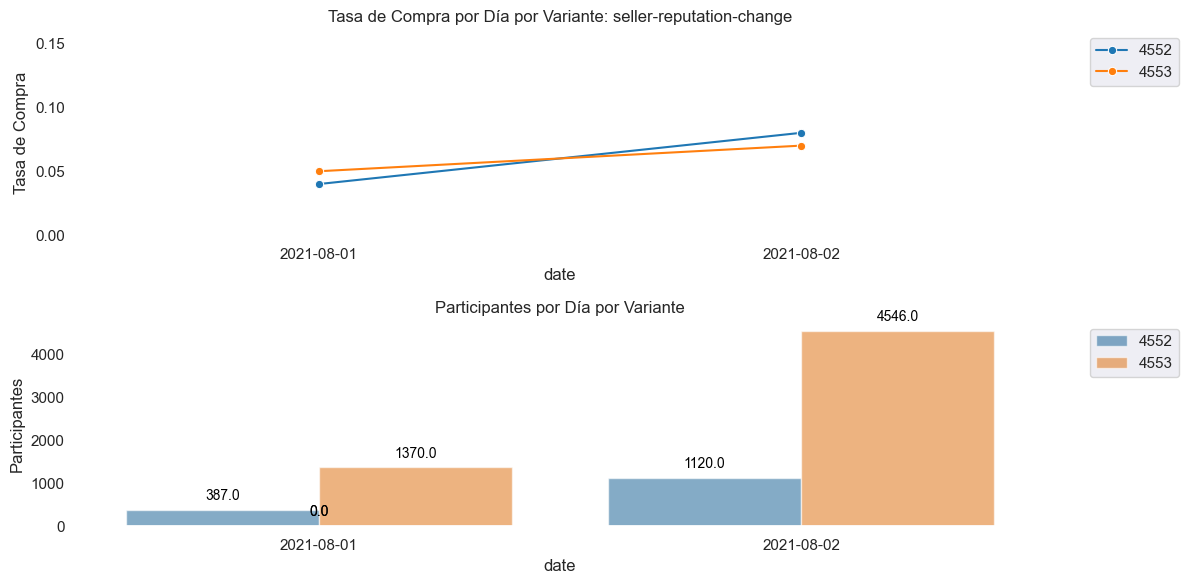

In [9]:
analyzer.analisis_experimento('seller-reputation-change')

In [10]:
AB_test_data = AnalisisExperimento(df_detailed_experiments)
AB_test_data.ab_test_discreto('seller-reputation-change')

+-----------+-----------------------+-----------------+-------------------+-----------------+
|   variant | concentration         |   average_value |   prob_being_best |   expected_loss |
+===========+=======================+=================+===================+=================+
|      4552 | {0: 1400.0, 1: 107.0} |       0.071002  |           0.72835 |       0.0011731 |
+-----------+-----------------------+-----------------+-------------------+-----------------+
|      4553 | {0: 5520.0, 1: 396.0} |       0.0669371 |           0.27165 |       0.0057041 |
+-----------+-----------------------+-----------------+-------------------+-----------------+


In [11]:
AB_test_data.ab_test_binario('seller-reputation-change')

+-----------+----------+-------------+-----------------+------------------+-------------------+-----------------+
|   variant |   totals |   positives |   positive_rate |   posterior_mean |   prob_being_best |   expected_loss |
+===========+==========+=============+=================+==================+===================+=================+
|      4552 |     1507 |         107 |         0.071   |          0.07129 |            0.7151 |       0.0012629 |
+-----------+----------+-------------+-----------------+------------------+-------------------+-----------------+
|      4553 |     5916 |         396 |         0.06694 |          0.06701 |            0.2849 |       0.0055176 |
+-----------+----------+-------------+-----------------+------------------+-------------------+-----------------+



* experimento almenos dos variantes / experimentos no tengan mucho default/ no se asigno variante / cant defaults

* cuantos usuarios/ cadena de navegacion termino el dia siguiente

* filtrar y mostrar experimenos invalidados o no tenidos en cuenta, imprimir análisis de al menos 4 experimentos diferentes...

* valida población e independencia entre los experimentos, para garantizar que no haya sesgos, ? y si compra el mismo productp ? de que equipo es ?
